In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.image as img
from PIL import Image
import collections
from keras.utils import to_categorical
from random import randint
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# paths for training and test data
trainPath = "input/seg_train/"
testPath = "input/seg_test/"

In [3]:
# define a function to load images
def load_image(infilename):
    image = Image.open(infilename)
    image.load()
    return image

In [4]:
# define etl function
def etl(folder):
    
    subFolders = os.listdir(folder)
    
    images = []
    X_data = []
    y_labels = []
    
    # read in images, convert to arrays, resize if necessary and append labels
    for subFolder in subFolders:
        
        subFolderPath = folder + subFolder + "/"
        print("Reading in images from " + subFolderPath)
        
        for file in os.listdir(subFolderPath):
            
            # read in image
            image = load_image(subFolderPath + file)
            
            # append image
            images.append(image)
            
            # convert to array
            array = np.asarray(image, dtype="int32")
            
            # resize if necessary
            if array.shape != (150, 150, 3):
                resized = image.resize((150, 150), Image.LANCZOS)
                array = np.asarray(resized, dtype="int32")

            # append data
            X_data.append(array)
            
            # append labels
            y_labels.append(subFolder)
    
    # Checks
    print("Number of data items = " + str(len(X_data)))
    print("Number of labels = " + str(len(y_labels)))
    print("Label frequencies: " + str(collections.Counter(y_labels)))
    
    # One-hot encode of labels
    
    # get number of classes
    classes = len(set(y_labels))

    # create dictionary which maps class to an integer label
    classDict = dict((label, counter) for counter, label in enumerate(list(set(y_labels))))
    print(classDict)

    # convert labels to integer values
    y_values = []
    for label in y_labels:
        y_values.append(classDict[label])

    # one-hot encode label values    
    y_onehot = to_categorical(y_values, classes)
    
    # Convert lists to arrays
    X_array = np.array(X_data)
    y_array = np.array(y_onehot)
    
    # Check array shapes
    print("X array shape = " + str(X_array.shape))
    print("y array shape = " + str(y_array.shape))
    print("y column totals = " + str(np.sum(y_array, axis=0)))
    
    # print out images and labels for 20 random records to make sure they are still aligned
    f, ax = plt.subplots(5, 4, figsize=(20, 20))
    for i in range(5):
        for j in range(4):
            r = randint(0,len(images))
            ax[i, j].imshow(images[r])
            ax[i, j].set_title(y_labels[r])
            ax[i, j].axis('off')
    
    # return as arrays
    return X_array, y_array, images, y_labels

Reading in images from input/seg_train/buildings/
Reading in images from input/seg_train/forest/
Reading in images from input/seg_train/glacier/
Reading in images from input/seg_train/mountain/
Reading in images from input/seg_train/sea/
Reading in images from input/seg_train/street/
Number of data items = 14034
Number of labels = 14034
Label frequencies: Counter({'mountain': 2512, 'glacier': 2404, 'street': 2382, 'sea': 2274, 'forest': 2271, 'buildings': 2191})
{'glacier': 0, 'sea': 1, 'buildings': 2, 'forest': 3, 'street': 4, 'mountain': 5}
X array shape = (14034, 150, 150, 3)
y array shape = (14034, 6)
y column totals = [2404. 2274. 2191. 2271. 2382. 2512.]


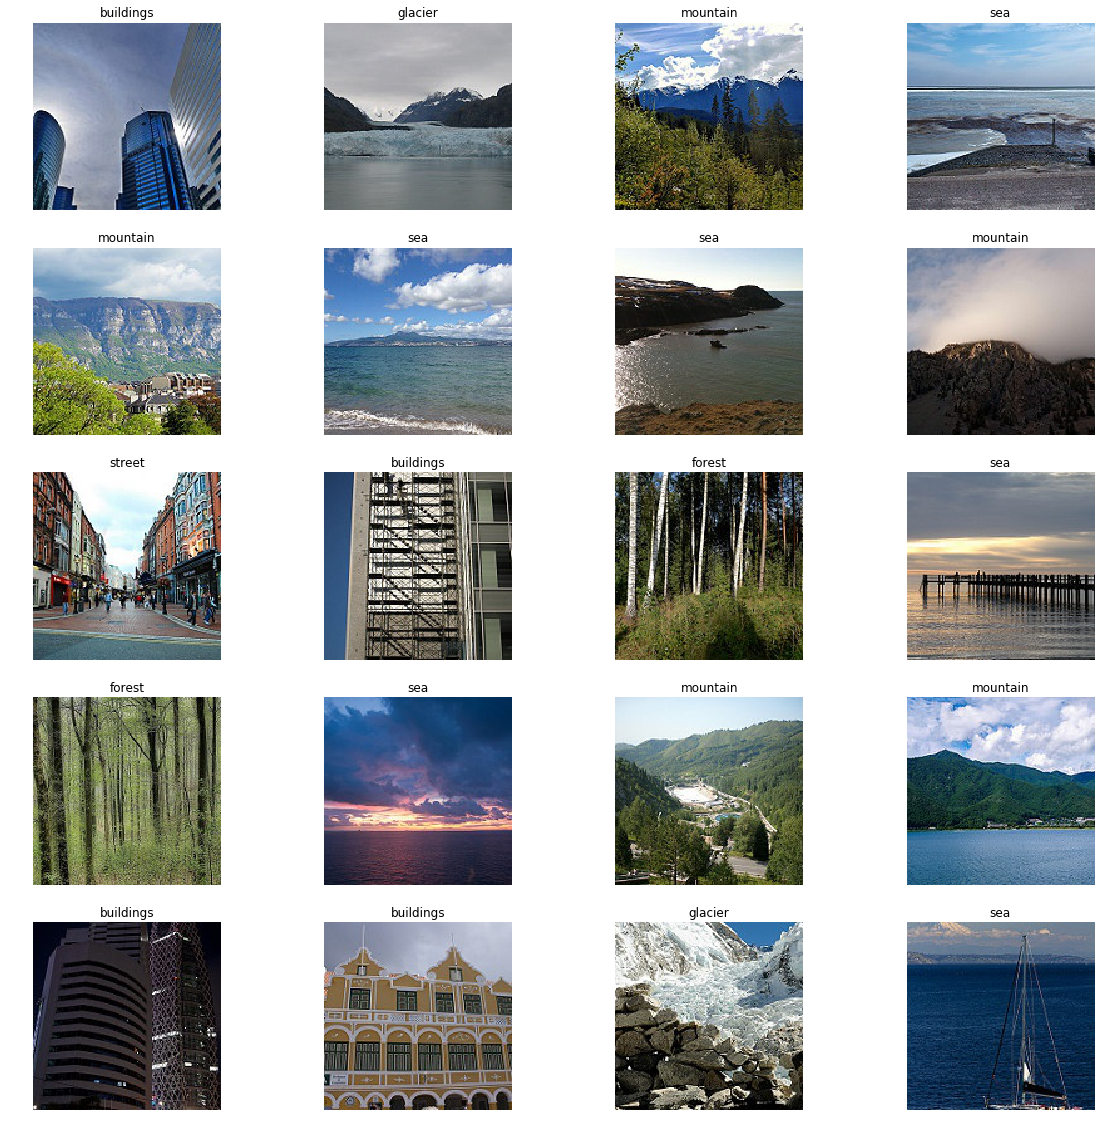

In [5]:
# Read in training data
X_train, y_train, images_train, labels_train = etl(trainPath)

Reading in images from input/seg_test/buildings/
Reading in images from input/seg_test/forest/
Reading in images from input/seg_test/glacier/
Reading in images from input/seg_test/mountain/
Reading in images from input/seg_test/sea/
Reading in images from input/seg_test/street/
Number of data items = 3000
Number of labels = 3000
Label frequencies: Counter({'glacier': 553, 'mountain': 525, 'sea': 510, 'street': 501, 'forest': 474, 'buildings': 437})
{'glacier': 0, 'sea': 1, 'buildings': 2, 'forest': 3, 'street': 4, 'mountain': 5}
X array shape = (3000, 150, 150, 3)
y array shape = (3000, 6)
y column totals = [553. 510. 437. 474. 501. 525.]


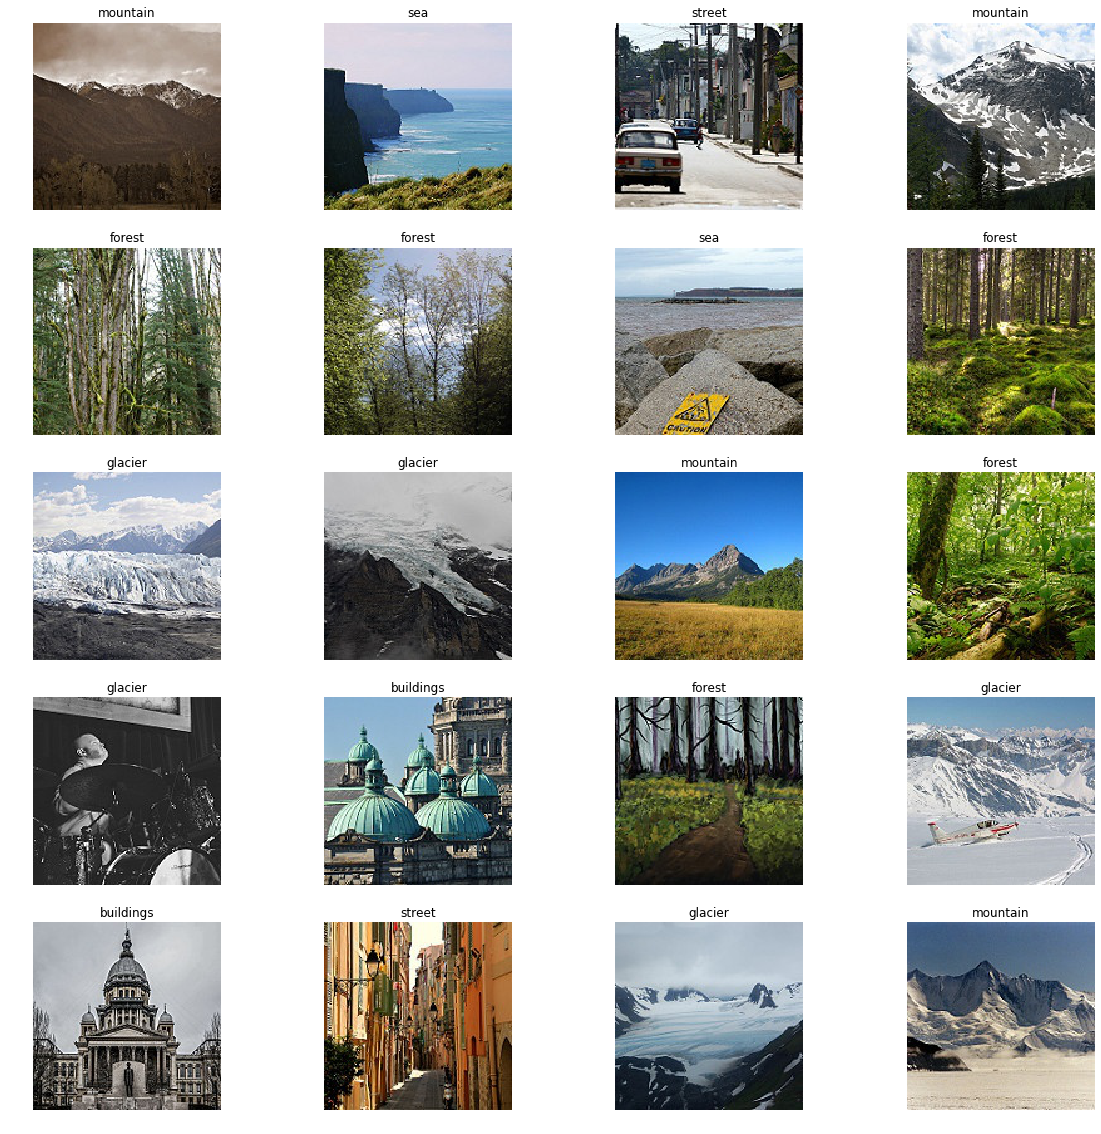

In [6]:
# Read in test data
X_test, y_test, images_test, labels_test = etl(testPath)